In [3]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, confusion_matrix
from sklearn.model_selection import GridSearchCV

## PART B - CLASSIFICATION MODELLING ##

### TASK 1 ###

In [9]:
# Load the dataset
file_path = "GDDA708_A2_BTC_Price_History_2015_2024_CL.csv"
btc_data = pd.read_csv(file_path)

# Display initial dataset info
print("Initial Dataset Columns:", btc_data.columns.tolist())

# Select and clean relevant columns
numeric_cols = [
    "open", "high", "low", "close", "volume", "rsi_7", "rsi_14", "cci_7", "cci_14", 
    "sma_50", "ema_50", "sma_100", "ema_100", "macd", "bollinger", "TrueRange", "atr_7", "atr_14"
]

# Convert numeric columns to float
for col in numeric_cols:
    btc_data[col] = pd.to_numeric(btc_data[col], errors="coerce")

# Handle missing values
btc_data.dropna(inplace=True)

# Detect and handle outliers using IQR method
Q1 = btc_data[numeric_cols].quantile(0.25)
Q3 = btc_data[numeric_cols].quantile(0.75)
IQR = Q3 - Q1
btc_data[numeric_cols] = btc_data[numeric_cols].clip(lower=Q1 - 1.5 * IQR, upper=Q3 + 1.5 * IQR, axis=1)

Initial Dataset Columns: ['date', 'open', 'high', 'low', 'close', 'volume', 'rsi_7', 'rsi_14', 'cci_7', 'cci_14', 'sma_50', 'ema_50', 'sma_100', 'ema_100', 'macd', 'bollinger', 'TrueRange', 'atr_7', 'atr_14', 'next_day_close']


In [11]:
# Task-1b: Perform feature scaling or normalization
scaler = StandardScaler()
btc_data[numeric_cols] = scaler.fit_transform(btc_data[numeric_cols])

# Task-1c: Encode categorical variables
if 'date' in btc_data.columns:
    btc_data["date"] = pd.to_datetime(btc_data["date"], format="%Y-%m-%d")
    btc_data["year"] = btc_data["date"].dt.year
    btc_data["month"] = btc_data["date"].dt.month
    btc_data["day"] = btc_data["date"].dt.day
    btc_data["day_of_week"] = btc_data["date"].dt.dayofweek
    btc_data.drop(columns=["date"], inplace=True)
else:
    print("Column 'date' not found. Skipping date-based feature extraction.")

# Drop unnecessary columns
columns_to_drop = ["next_day_close"]
btc_data.drop(columns=[col for col in columns_to_drop if col in btc_data.columns], inplace=True)

# Task-1d: Split dataset into training and testing sets
X = btc_data.drop(columns=["close"])
y = (btc_data["close"] > btc_data["open"]).astype(int)  # Binary classification target

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Save cleaned dataset for future use
cleaned_file_path = 'GDDA708_BTC_Cleaned_2015_2024_CL.csv'
btc_data.to_csv(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}.")

# Display dataset shapes
print("Training Set:", X_train.shape, y_train.shape)
print("Testing Set:", X_test.shape, y_test.shape)

Cleaned dataset saved to GDDA708_BTC_Cleaned_2015_2024_CL.csv.
Training Set: (2724, 21) (2724,)
Testing Set: (682, 21) (682,)


## TASK 2 ##

In [47]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import classification_report, accuracy_score, roc_auc_score, confusion_matrix

In [23]:
# Task 2a: Select classification models
print("\n=== Task 2a: Model Selection ===")
models = {
    "Random Forest": RandomForestClassifier(random_state=42),
    "Support Vector Machine": SVC(probability=True, random_state=42),
    "K-Nearest Neighbors": KNeighborsClassifier(),
    "Naïve Bayes": GaussianNB(),
    "Logistic Regression": LogisticRegression(random_state=42, max_iter=1000)
}

# Task 2b: Hyperparameter tuning using GridSearchCV
print("\n=== Task 2b: Hyperparameter Tuning ===")

param_grids = {
    "Random Forest": {
        'n_estimators': [50, 100, 200],
        'max_depth': [None, 10, 20],
        'min_samples_split': [2, 5, 10]
    },
    "Support Vector Machine": {
        'C': [0.1, 1, 10],
        'kernel': ['linear', 'rbf']
    },
    "K-Nearest Neighbors": {
        'n_neighbors': [3, 5, 7, 9],
        'weights': ['uniform', 'distance']
    },
    "Naïve Bayes": {
        'var_smoothing': [1e-9, 1e-8, 1e-7]
    },
    "Logistic Regression": {
        'C': [0.01, 0.1, 1, 10],
        'solver': ['liblinear']
    }
}

best_models = {}

for model_name, model in models.items():
    print(f"\nTuning hyperparameters for {model_name}...")
    grid_search = GridSearchCV(model, param_grids[model_name], cv=5, scoring='accuracy', n_jobs=-1)
    grid_search.fit(X_train, y_train)
    best_models[model_name] = grid_search.best_estimator_
    print(f"Best parameters for {model_name}: {grid_search.best_params_}")


=== Task 2a: Model Selection ===

=== Task 2b: Hyperparameter Tuning ===

Tuning hyperparameters for Random Forest...
Best parameters for Random Forest: {'max_depth': 10, 'min_samples_split': 10, 'n_estimators': 50}

Tuning hyperparameters for Support Vector Machine...
Best parameters for Support Vector Machine: {'C': 10, 'kernel': 'linear'}

Tuning hyperparameters for K-Nearest Neighbors...
Best parameters for K-Nearest Neighbors: {'n_neighbors': 9, 'weights': 'uniform'}

Tuning hyperparameters for Naïve Bayes...
Best parameters for Naïve Bayes: {'var_smoothing': 1e-09}

Tuning hyperparameters for Logistic Regression...
Best parameters for Logistic Regression: {'C': 10, 'solver': 'liblinear'}



=== Task 2c: Model Building and Evaluation ===

Training and evaluating Random Forest...
Accuracy for Random Forest: 0.6994134897360704
ROC-AUC Score for Random Forest: 0.7774064171122994
Classification Report for Random Forest:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       374
           1       0.70      0.58      0.63       308

    accuracy                           0.70       682
   macro avg       0.70      0.69      0.69       682
weighted avg       0.70      0.70      0.69       682



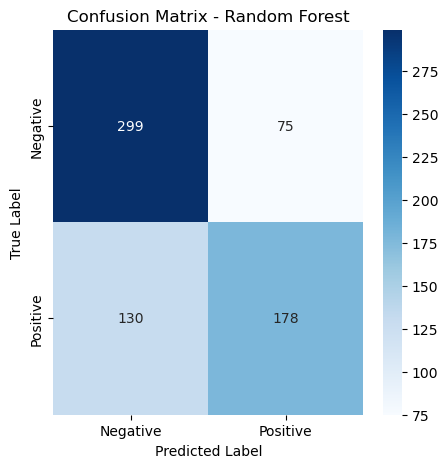


Training and evaluating Support Vector Machine...
Accuracy for Support Vector Machine: 0.7360703812316716
ROC-AUC Score for Support Vector Machine: 0.8021216751163276
Classification Report for Support Vector Machine:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       374
           1       0.76      0.61      0.68       308

    accuracy                           0.74       682
   macro avg       0.74      0.72      0.73       682
weighted avg       0.74      0.74      0.73       682



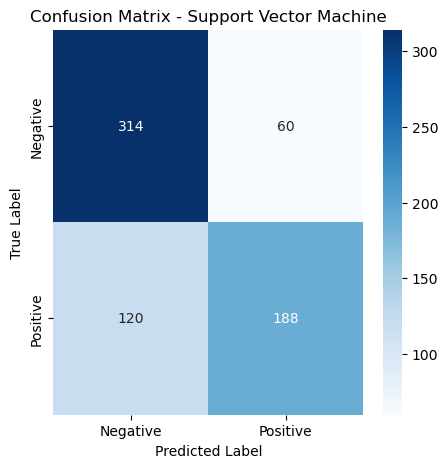


Training and evaluating K-Nearest Neighbors...
Accuracy for K-Nearest Neighbors: 0.5762463343108505
ROC-AUC Score for K-Nearest Neighbors: 0.601187582471005
Classification Report for K-Nearest Neighbors:
              precision    recall  f1-score   support

           0       0.59      0.71      0.65       374
           1       0.54      0.41      0.47       308

    accuracy                           0.58       682
   macro avg       0.57      0.56      0.56       682
weighted avg       0.57      0.58      0.57       682



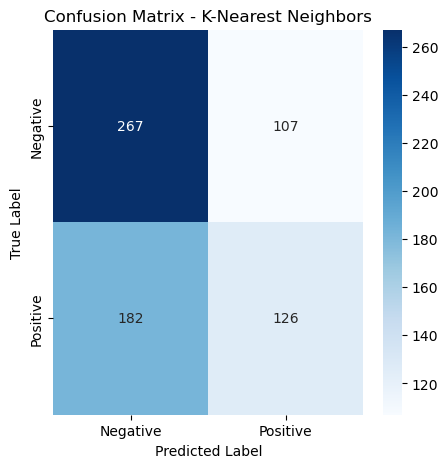


Training and evaluating Naïve Bayes...
Accuracy for Naïve Bayes: 0.6510263929618768
ROC-AUC Score for Naïve Bayes: 0.6979911799430515
Classification Report for Naïve Bayes:
              precision    recall  f1-score   support

           0       0.67      0.73      0.70       374
           1       0.63      0.55      0.59       308

    accuracy                           0.65       682
   macro avg       0.65      0.64      0.64       682
weighted avg       0.65      0.65      0.65       682



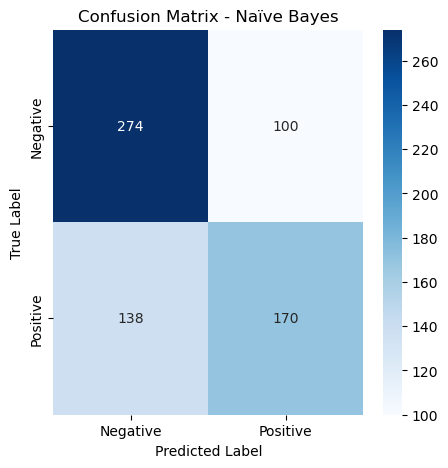


Training and evaluating Logistic Regression...
Accuracy for Logistic Regression: 0.7478005865102639
ROC-AUC Score for Logistic Regression: 0.8250659768039449
Classification Report for Logistic Regression:
              precision    recall  f1-score   support

           0       0.74      0.83      0.78       374
           1       0.76      0.64      0.70       308

    accuracy                           0.75       682
   macro avg       0.75      0.74      0.74       682
weighted avg       0.75      0.75      0.74       682



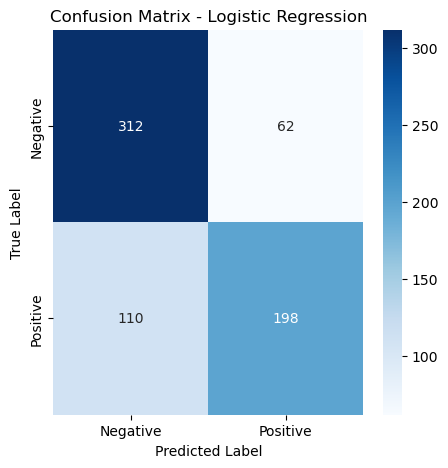


Model building and tuning completed successfully.


In [27]:
# Task 2c: Train models and evaluate
print("\n=== Task 2c: Model Building and Evaluation ===")

for model_name, model in best_models.items():
    print(f"\nTraining and evaluating {model_name}...")
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    y_prob = model.predict_proba(X_test)[:, 1] if hasattr(model, "predict_proba") else None
    
    # Print evaluation metrics
    print(f"Accuracy for {model_name}: {accuracy_score(y_test, y_pred)}")
    print(f"ROC-AUC Score for {model_name}: {roc_auc_score(y_test, y_prob) if y_prob is not None else 'N/A'}")
    print(f"Classification Report for {model_name}:")
    print(classification_report(y_test, y_pred))
    
    # Confusion matrix visualization
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

print("\nModel building and tuning completed successfully.")

### TASK 3 ###

In [29]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (accuracy_score, precision_score, recall_score, f1_score, classification_report, confusion_matrix)


=== Task 3a: Confusion Matrix Analysis ===

Confusion Matrix for Random Forest:


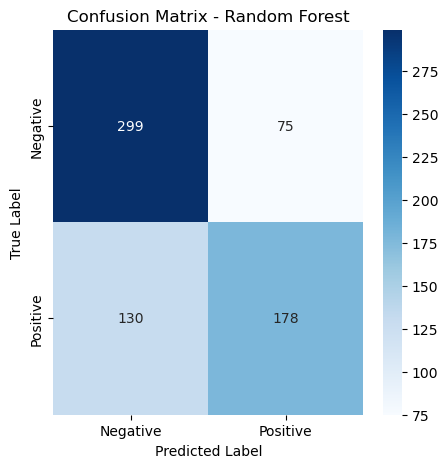


Confusion Matrix for Support Vector Machine:


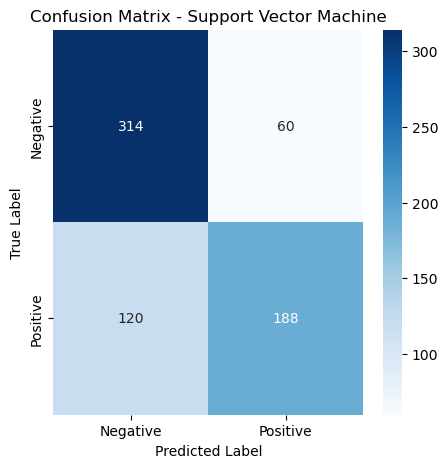


Confusion Matrix for K-Nearest Neighbors:


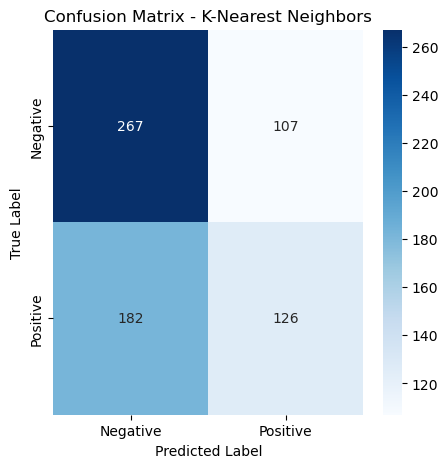


Confusion Matrix for Naïve Bayes:


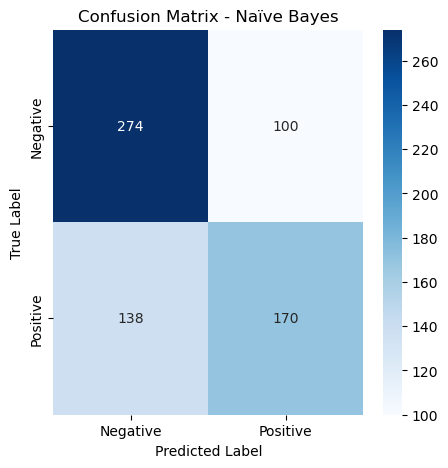


Confusion Matrix for Logistic Regression:


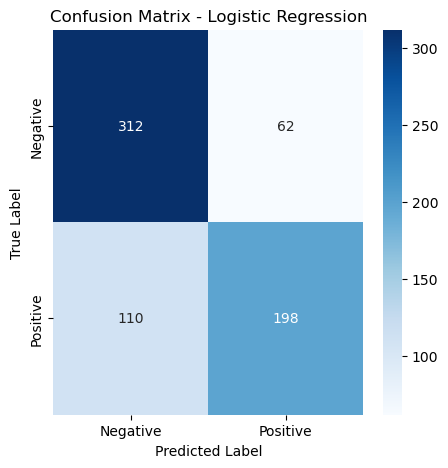

In [31]:
# Use best models from Task 2
best_models = best_models  # Uses the fine-tuned models

# Directly use X_train, X_test, y_train, y_test from Task 1

# Task 3a: Confusion Matrix Analysis
print("\n=== Task 3a: Confusion Matrix Analysis ===")

conf_matrices = {}

for model_name, model in best_models.items():
    print(f"\nConfusion Matrix for {model_name}:")
    y_pred = model.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    
    # Store for comparison
    conf_matrices[model_name] = cm
    
    plt.figure(figsize=(5,5))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative', 'Positive'], yticklabels=['Negative', 'Positive'])
    plt.xlabel('Predicted Label')
    plt.ylabel('True Label')
    plt.title(f'Confusion Matrix - {model_name}')
    plt.show()

In [33]:
# Task 3b: Evaluate Performance with Metrics
print("\n=== Task 3b: Model Performance Metrics ===")

metrics_data = []

for model_name, model in best_models.items():
    y_pred = model.predict(X_test)
    
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, zero_division=1)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Append results for later comparison
    metrics_data.append([model_name, accuracy, precision, recall, f1])
    
    print(f"\nPerformance Metrics for {model_name}:")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1-score: {f1:.4f}")
    print("Classification Report:")
    print(classification_report(y_test, y_pred, zero_division=1))

# Convert results to DataFrame
metrics_df = pd.DataFrame(metrics_data, columns=["Model", "Accuracy", "Precision", "Recall", "F1-score"])
print("\nSummary of Performance Metrics:")
display(metrics_df)



=== Task 3b: Model Performance Metrics ===

Performance Metrics for Random Forest:
Accuracy: 0.6994
Precision: 0.7036
Recall: 0.5779
F1-score: 0.6346
Classification Report:
              precision    recall  f1-score   support

           0       0.70      0.80      0.74       374
           1       0.70      0.58      0.63       308

    accuracy                           0.70       682
   macro avg       0.70      0.69      0.69       682
weighted avg       0.70      0.70      0.69       682


Performance Metrics for Support Vector Machine:
Accuracy: 0.7361
Precision: 0.7581
Recall: 0.6104
F1-score: 0.6763
Classification Report:
              precision    recall  f1-score   support

           0       0.72      0.84      0.78       374
           1       0.76      0.61      0.68       308

    accuracy                           0.74       682
   macro avg       0.74      0.72      0.73       682
weighted avg       0.74      0.74      0.73       682


Performance Metrics for K-Neares

,Model,Accuracy,Precision,Recall,F1-score
0,Random Forest,0.699413,0.703557,0.577922,0.634581
1,Support Vector Machine,0.736070,0.758065,0.610390,0.676259
2,K-Nearest Neighbors,0.576246,0.540773,0.409091,0.465804
3,Naïve Bayes,0.651026,0.629630,0.551948,0.588235
4,Logistic Regression,0.747801,0.761538,0.642857,0.697183


In [35]:
# Task 3c: Implement k-Fold Cross-Validation (5-Fold)
print("\n=== Task 3c: k-Fold Cross-Validation ===")

k_fold = 5
cv_results = {}

for model_name, model in best_models.items():
    scores = cross_val_score(model, X_train, y_train, cv=k_fold, scoring='accuracy')
    cv_results[model_name] = scores
    print(f"\n{k_fold}-Fold Cross-Validation for {model_name}:")
    print(f"Mean Accuracy: {scores.mean():.4f}, Standard Deviation: {scores.std():.4f}")

# Task 3d: Select Best-Performing Model
print("\n=== Task 3d: Best Model Selection ===")
best_model_name = max(cv_results, key=lambda k: cv_results[k].mean())
best_model = best_models[best_model_name]

print(f"\n The best-performing model is: **{best_model_name}**")
print("Justification:")
print("- Selected based on the highest mean accuracy across k-Fold Cross-Validation.")
print("- Ensures better generalization performance across different data splits.")
print("- Suitable for the business problem by minimizing classification errors while maintaining a balance between precision and recall.")

print("\n Model evaluation and selection completed successfully.")


=== Task 3c: k-Fold Cross-Validation ===

5-Fold Cross-Validation for Random Forest:
Mean Accuracy: 0.7070, Standard Deviation: 0.0281

5-Fold Cross-Validation for Support Vector Machine:
Mean Accuracy: 0.7287, Standard Deviation: 0.0244

5-Fold Cross-Validation for K-Nearest Neighbors:
Mean Accuracy: 0.5830, Standard Deviation: 0.0102

5-Fold Cross-Validation for Naïve Bayes:
Mean Accuracy: 0.6358, Standard Deviation: 0.0268

5-Fold Cross-Validation for Logistic Regression:
Mean Accuracy: 0.7493, Standard Deviation: 0.0172

=== Task 3d: Best Model Selection ===

 The best-performing model is: **Logistic Regression**
Justification:
- Selected based on the highest mean accuracy across k-Fold Cross-Validation.
- Ensures better generalization performance across different data splits.
- Suitable for the business problem by minimizing classification errors while maintaining a balance between precision and recall.

 Model evaluation and selection completed successfully.
